In [1]:
# Import necessary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
import datetime as dt
import plotly.graph_objects as go
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input

2025-07-10 18:03:14.464994: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-10 18:03:14.550096: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-10 18:03:14.616080: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752141794.668288    3740 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752141794.683559    3740 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752141794.806530    3740 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
stock = "IBM"
start = dt.datetime(2000,1,1)
end = dt.datetime(2025,1,1)

df = yf.download(stock,start,end)

/tmp/ipykernel_3740/1698282831.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,IBM,IBM,IBM,IBM,IBM
Date,,,,,
2000-01-03,58.120476,58.120476,56.053695,56.335526,10823694
2000-01-04,56.147636,57.368919,55.552653,57.118399,8606279
2000-01-05,58.120476,59.999373,56.178955,56.586046,13318927
2000-01-06,57.118412,59.592289,56.867892,59.122565,8338607
2000-01-07,56.867889,59.091246,55.427403,58.746783,12402108


In [6]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,IBM,IBM,IBM,IBM,IBM
Date,,,,,
2024-12-24,221.451202,221.480806,218.619033,219.339418,1186200
2024-12-26,221.924866,222.428136,219.615722,220.365696,3286500
2024-12-27,219.842682,221.461058,218.490750,220.197936,1810800
2024-12-30,217.346039,218.668368,214.780313,217.632209,2095600
2024-12-31,216.931580,218.135495,215.559907,217.809844,2270200


In [7]:
df.shape

(6289, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6289 entries, 2000-01-03 to 2024-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, IBM)   6289 non-null   float64
 1   (High, IBM)    6289 non-null   float64
 2   (Low, IBM)     6289 non-null   float64
 3   (Open, IBM)    6289 non-null   float64
 4   (Volume, IBM)  6289 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 294.8 KB


In [9]:
df.isnull().sum()

Price   Ticker
Close   IBM       0
High    IBM       0
Low     IBM       0
Open    IBM       0
Volume  IBM       0
dtype: int64

In [10]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,IBM,IBM,IBM,IBM,IBM
count,6289.000000,6289.000000,6289.000000,6289.000000,6.289000e+03
mean,86.376275,87.097418,85.621604,86.334997,6.117757e+06
std,35.850834,36.031748,35.627830,35.831213,3.434675e+06
min,28.010283,28.839349,27.471140,27.796663,1.074765e+06
25%,52.922874,53.761605,52.154175,52.863991,3.865075e+06
50%,93.506386,94.257765,92.814180,93.514130,5.238100e+06
75%,109.952789,110.748436,109.153496,109.927295,7.369907e+06
max,234.901474,236.194211,231.131848,234.862005,4.310284e+07


In [11]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,IBM,IBM,IBM,IBM,IBM
0,2000-01-03,58.120476,58.120476,56.053695,56.335526,10823694
1,2000-01-04,56.147636,57.368919,55.552653,57.118399,8606279
2,2000-01-05,58.120476,59.999373,56.178955,56.586046,13318927
3,2000-01-06,57.118412,59.592289,56.867892,59.122565,8338607
4,2000-01-07,56.867889,59.091246,55.427403,58.746783,12402108


In [12]:
df.to_csv("IBMStock.csv")
datacsv = pd.read_csv("IBMStock.csv")

In [13]:
datacsv.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,IBM,IBM,IBM,IBM,IBM
1,0,2000-01-03,58.12047576904297,58.12047576904297,56.05369490529813,56.335526478466036,10823694
2,1,2000-01-04,56.14763641357422,57.36891850825019,55.55265334161177,57.11839889916479,8606279
3,2,2000-01-05,58.12047576904297,59.999372915804244,56.17895471508221,56.58604609803421,13318927
4,3,2000-01-06,57.118412017822266,59.592288727650754,56.86789235119881,59.1225653523474,8338607


In [14]:
#Candlesticks
fig = go.Figure(data = [go.Candlestick(x = datacsv['Date'],
                                       open = datacsv['Open'],
                                       close = datacsv['Close'],
                                       low = datacsv['Low'],
                                       high = datacsv['High'])])
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

In [15]:
df.drop(['Date'], axis =1)
df.head()

/tmp/ipykernel_13648/3812569301.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



Price,Date,Close,High,Low,Open,Volume
Ticker,,IBM,IBM,IBM,IBM,IBM
0,2000-01-03,58.120476,58.120476,56.053695,56.335526,10823694
1,2000-01-04,56.147636,57.368919,55.552653,57.118399,8606279
2,2000-01-05,58.120476,59.999373,56.178955,56.586046,13318927
3,2000-01-06,57.118412,59.592289,56.867892,59.122565,8338607
4,2000-01-07,56.867889,59.091246,55.427403,58.746783,12402108


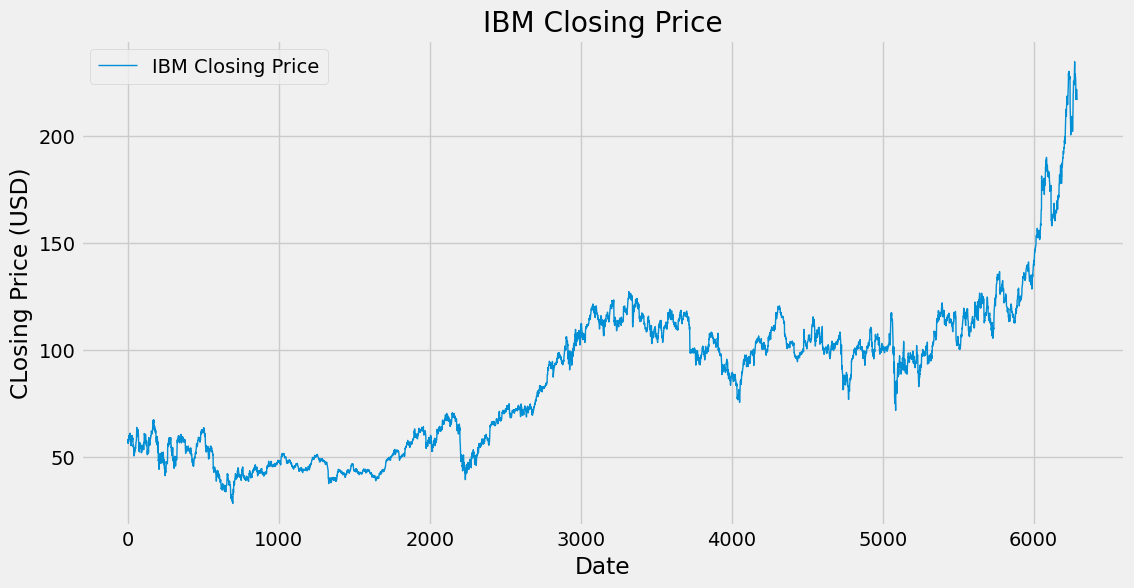

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label= f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing Price')
plt.xlabel('Date')
plt.ylabel('CLosing Price (USD)')
plt.legend()
plt.show()

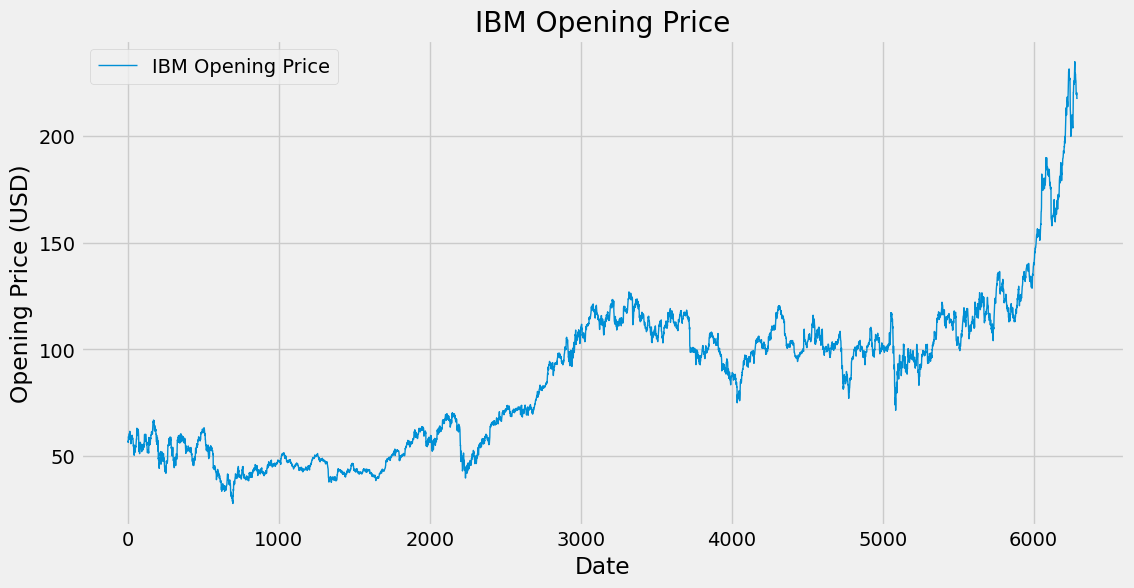

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df['Open'], label=f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening Price')
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.legend()
plt.show()

In [18]:
#Getting the moving average of Closing Price, top 100
ma100 = df['Close'].rolling(100).mean()

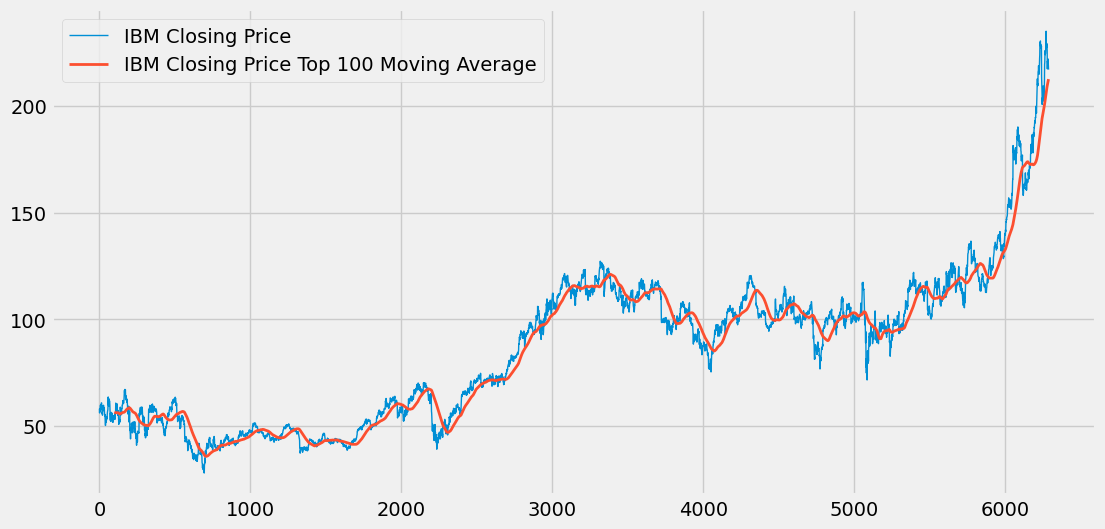

In [30]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label=f'{stock} Closing Price', linewidth=1)
plt.plot(ma100, label=f'{stock} Closing Price Top 100 Moving Average', linewidth=2)
plt.legend()
plt.show()

In [20]:
#Calculating Exponential Moving Average
expo_ma100 = df['Close'].ewm(span=100,adjust=False).mean()

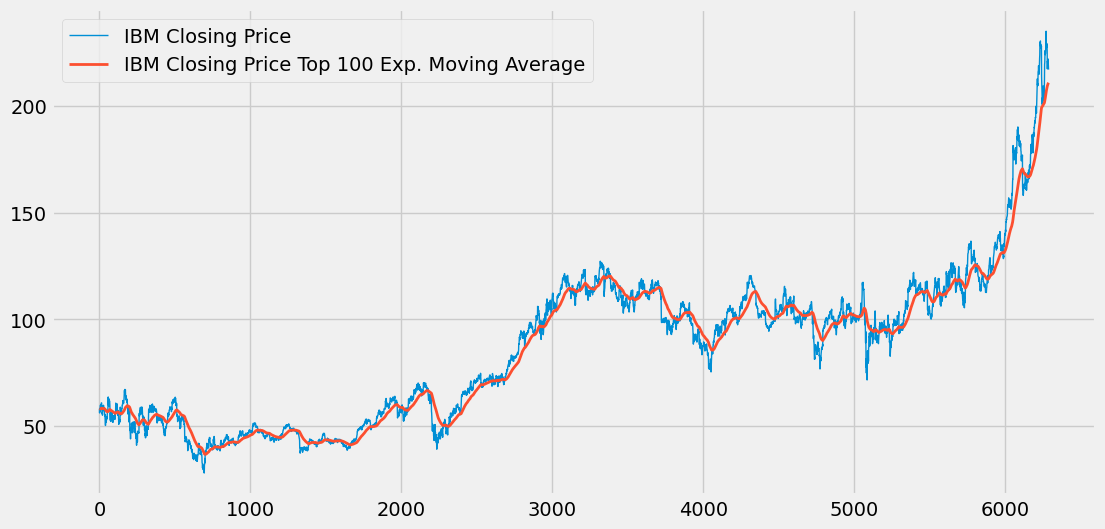

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label=f'{stock} Closing Price', linewidth=1)
plt.plot(expo_ma100, label=f'{stock} Closing Price Top 100 Exp. Moving Average', linewidth=2)
plt.legend()
plt.show()

In [22]:
#USAGE OF LSTM

In [42]:
#Testing and Training
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [24]:
data_train.shape

(4402, 1)

In [25]:
data_test.shape

(1887, 1)

In [43]:
scaler = MinMaxScaler(feature_range=(0,1))
data_train_array = scaler.fit_transform(data_train)
data_train_array

array([[0.30353263],
       [0.28364484],
       [0.30353263],
       ...,
       [0.76468695],
       [0.75666495],
       [0.75464269]])

In [44]:
x_train = []
y_train = []

for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i,0])

x_train,y_train = np.array(x_train), np.array(y_train)

In [9]:
x_train.shape

(4302, 100, 1)

In [37]:
#Build Model
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))

model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [38]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - loss: 0.0705
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - loss: 0.0082
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - loss: 0.0072
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 16s 122ms/step - loss: 0.0067
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 18s 133ms/step - loss: 0.0066
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 18s 135ms/step - loss: 0.0054
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step - loss: 0.0049
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 18s 135ms/step - loss: 0.0048
Epoch 9/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step - loss: 0.0044
Epoch 10/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 145ms/step - loss: 0.0041
Epoch 11/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 21s 155ms/step - loss: 0.0043
Epoch 12/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step - loss: 0.0045
Epoch 13/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 21s 158ms/step - loss: 0.0036
Epoch 14/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 22s 159ms/step - loss: 0.0034
Epoch 15/50
135

In [41]:
model.save("mymodel.h5")

In [45]:
from tensorflow.keras.models import load_model
saved_model = load_model("mymodel.h5")

In [46]:
saved_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,763 (698.30 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [47]:
 past_100_days = data_train.tail(100)

In [48]:
combined_data = pd.concat([past_100_days, data_test], ignore_index=True)
combined_data.shape

(1987, 1)

In [49]:
input_data = scaler.fit_transform(combined_data)

In [50]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test,y_test = np.array(x_test), np.array(y_test)

In [51]:
y_predicted = saved_model.predict(x_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


In [52]:
y_predicted.shape

(1887, 1)

In [40]:
y_predicted_original = scaler.inverse_transform(y_predicted)

In [53]:
scaler.scale_

array([0.0061234])

In [54]:
scaler_factor = 1 / 0.0061234
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

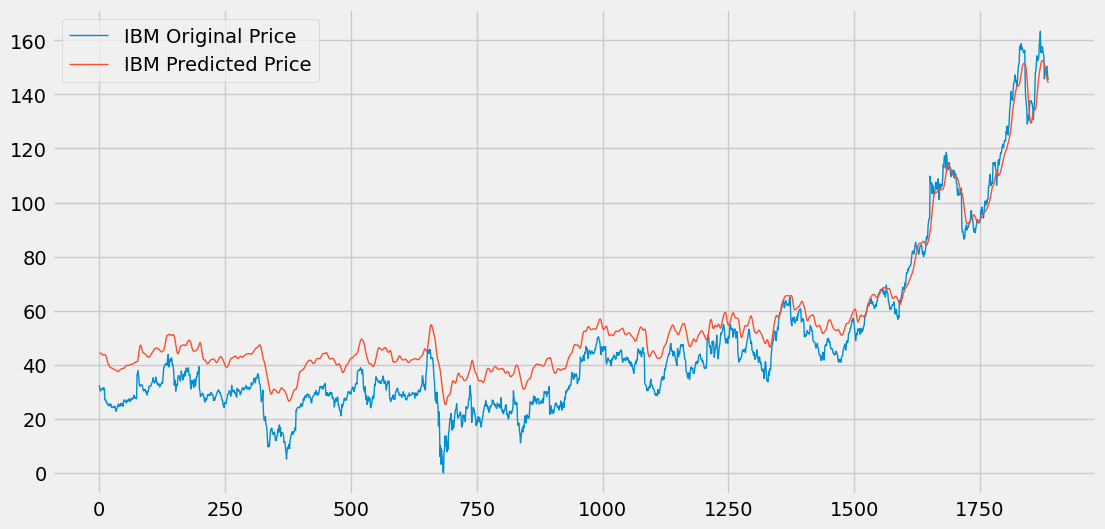

In [56]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label=f'{stock} Original Price', linewidth = 1)
plt.plot(y_predicted, label=f'{stock} Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [60]:
saved_model.save('stock_dl_model.h5')